## 1. Import and understand the data.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn


### 1a) Import ‘signal-data.csv’ as DataFrame

In [2]:
df1 = pd.read_csv('signal-data.csv')
df1.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [3]:
df1.shape

(1567, 592)

The dataframe 'df1' has 1567 rows and 592 colomns ,<br>
which means the rows are more than $+$100% of colomns.<br>
This can lead to Curse of Dimensionality

### 1b) Print 5 point summary and share at least 2 observations

In [4]:
df1.describe()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


#### One of the critical feature is df1['4'] which has a mean of 4.197013 , median of 1.316800, q3 is 1.525700
1. It has a high standard deviation of 56.35 which leads to high variance <br>
2. df1['4'] also has a very high maximum value of 1114.53 when compared with mean, median and third quartile, which says it has a very distant outliers and has a huge tail in the gaussian distribution. <br>

#### Second critical feature  is df1['5'] which has a mean of 100.0, median of 100.0, Q3 of 100.0
1. It has standard deviation of 0.0, which means the feature doesnot vary from mean (i.e it doenot show any variance).
2. A variance of zero means all the data points are equal to the mean value.

## 2. Data cleansing:

### 2a) Write a for loop which will remove all the features with 20%+ Null values and impute rest with mean of the feature.

In [5]:
df1.dtypes

Time          object
0            float64
1            float64
2            float64
3            float64
              ...   
586          float64
587          float64
588          float64
589          float64
Pass/Fail      int64
Length: 592, dtype: object

In [6]:
df1.replace(to_replace=' ', value=np.nan, inplace=True) #### Replacing the empty string if they are any into NaN values

Converting total null values of each coloumn in terms of  percentage below:

In [7]:
(df1.isna().sum())/(df1.shape[0])*100

Time         0.000000
0            0.382897
1            0.446713
2            0.893427
3            0.893427
               ...   
586          0.063816
587          0.063816
588          0.063816
589          0.063816
Pass/Fail    0.000000
Length: 592, dtype: float64

#### From the above output we can observe that the feature 'Time' has no null values, so we can ignore that in the loop as it is of the object dtype

In [8]:
# Importing Simple Imputer from sklearn for imputing inside the loop below:
from sklearn.impute import SimpleImputer
Imputer = SimpleImputer(missing_values=np.nan, strategy='mean', verbose=2)

Creating FOR Loop below:

In [9]:
for colomns in df1.columns:
    if df1[colomns].isna().sum()/(df1.shape[0])*100>= 20.00:
       # print('The coloumn that has null value greater than 20% are: \n', colomns)
        df1.drop(columns=colomns,inplace=True)
    
    elif ( df1[colomns].isna().sum())/(df1.shape[0])*100<= 20.00 and (df1[colomns].isna().sum())/(df1.shape[0])*100!= 0.00:
       # print('The coloumn that has null value less than 20% are: \n', colomns)
        df1[colomns].fillna(df1[colomns].mean(), inplace=True)
    else:
        pass
        
        
       
    
        
    pass
    

    

In the above loop we created the condition in such a way that if the dataframe features consists of null value percentage greater than equal to 20% it drops the feature, whereas if the feature contains null value percentage less than equal to 20% and not equal to 0% , it imputes the null values with mean() of the feature. 

After dropping the coloumns with +20% null values the shape of the dataframe df1 has changed as below:

In [10]:

df1.shape 

(1567, 560)

The number of coloumns has been decresed from 592 to 560 and the rows remained the same <br>
from this we can say that the data is moving towards increase in curse of dimensionality, because the number of rows are 1567 which is more.

### 2b) Identify and drop the features which are having same value for all the rows

In [11]:
for coloumns in df1.columns:
    #As the number of index locations are starting from 0 and ending at 1566 so we substracted 1 from shape of df1.shape[0] to get 1566
    if df1[coloumns].duplicated().sum() == (df1.shape[0] - 1):
        print('The DUplicated COloumn Dropped is {}'.format(coloumns))
        df1.drop(columns=coloumns, inplace=True)
    else:
        pass

The DUplicated COloumn Dropped is 5
The DUplicated COloumn Dropped is 13
The DUplicated COloumn Dropped is 42
The DUplicated COloumn Dropped is 49
The DUplicated COloumn Dropped is 52
The DUplicated COloumn Dropped is 69
The DUplicated COloumn Dropped is 97
The DUplicated COloumn Dropped is 141
The DUplicated COloumn Dropped is 149
The DUplicated COloumn Dropped is 178
The DUplicated COloumn Dropped is 179
The DUplicated COloumn Dropped is 186
The DUplicated COloumn Dropped is 189
The DUplicated COloumn Dropped is 190
The DUplicated COloumn Dropped is 191
The DUplicated COloumn Dropped is 192
The DUplicated COloumn Dropped is 193
The DUplicated COloumn Dropped is 194
The DUplicated COloumn Dropped is 226
The DUplicated COloumn Dropped is 229
The DUplicated COloumn Dropped is 230
The DUplicated COloumn Dropped is 231
The DUplicated COloumn Dropped is 232
The DUplicated COloumn Dropped is 233
The DUplicated COloumn Dropped is 234
The DUplicated COloumn Dropped is 235
The DUplicated COlou

In [12]:
df1.shape

(1567, 444)

After dropping the features that has all the rows which has equal values, the shape of the dataframe df1 has been changed from the previous shape of (1567, 560) to the shape of (1567, 444) <br> Hence we can say that the data has some curse of dimensionality

### 2c) Drop other features if required using relevant functional knowledge. Clearly justify the same.

In [13]:
correlation_df1 = df1.corr()

In [14]:
correlation_df1

,0,1,2,3,4,6,7,8,9,10,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,1.000000,-0.143840,0.004756,-0.007613,-0.011014,0.002270,0.031483,-0.052622,0.009045,0.006504,...,0.008601,0.000224,0.023453,0.019907,0.023589,0.018443,-0.025880,-0.028166,0.004174,-0.025141
1,-0.143840,1.000000,0.005767,-0.007568,-0.001636,-0.025564,-0.012037,0.031258,0.023964,0.009645,...,-0.010145,0.043556,0.002904,-0.001264,0.002273,-0.009403,0.017266,0.010118,0.044797,-0.002603
2,0.004756,0.005767,1.000000,0.298935,0.095891,-0.136225,-0.146213,0.023528,0.016168,0.069893,...,-0.028705,-0.006023,0.015697,0.018225,0.015752,-0.025495,-0.029345,-0.030818,-0.032890,-0.000957
3,-0.007613,-0.007568,0.298935,1.000000,-0.058483,-0.685835,0.073856,-0.102892,0.068215,0.049873,...,0.016438,0.008988,0.025436,0.024736,0.026019,0.034711,-0.039132,-0.033645,-0.080341,-0.024623
4,-0.011014,-0.001636,0.095891,-0.058483,1.000000,-0.074368,-0.347734,-0.025946,0.054206,-0.006470,...,-0.004070,0.045081,-0.001300,-0.001597,-0.001616,-0.043929,-0.031005,-0.026100,0.050910,-0.013756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,0.018443,-0.009403,-0.025495,0.034711,-0.043929,-0.041209,0.058113,0.010433,0.033738,0.000327,...,-0.002684,-0.016726,0.002257,0.001605,0.002743,1.000000,0.167913,0.164238,-0.486559,0.004156
587,-0.025880,0.017266,-0.029345,-0.039132,-0.031005,0.034027,-0.021426,0.022845,0.059301,0.046965,...,-0.009405,-0.024473,-0.002649,-0.002498,-0.002930,0.167913,1.000000,0.974276,0.390813,0.035391
588,-0.028166,0.010118,-0.030818,-0.033645,-0.026100,0.032227,-0.020893,0.026250,0.060758,0.046048,...,-0.015596,-0.020705,-0.002260,-0.001957,-0.002530,0.164238,0.974276,1.000000,0.389211,0.031167
589,0.004174,0.044797,-0.032890,-0.080341,0.050910,0.043777,-0.107804,-0.022770,0.004880,0.008393,...,-0.024766,0.041486,-0.003008,-0.003295,-0.003800,-0.486559,0.390813,0.389211,1.000000,-0.002653


In [15]:
p_f_corr = abs(correlation_df1['Pass/Fail'])

In [16]:
corr_plus3 = p_f_corr[p_f_corr <= 0.05].index

In [17]:
corr_plus3

Index(['0', '1', '2', '3', '4', '6', '7', '8', '9', '10',
       ...
       '576', '577', '582', '583', '584', '585', '586', '587', '588', '589'],
      dtype='object', length=359)

In [18]:
df1.drop(columns=corr_plus3, inplace=True)

In [19]:
df1.shape

(1567, 85)

#### Therefore we dropped 359 coloumns that have correlation of less than or equal to 0.05 with respect to the target coloumn df1['Pass/Fail']. Now we get the new shape of the dataframe df1, that is (1567, 85)

In [20]:
df1.corr()

,14,21,22,26,28,32,33,38,40,56,...,510,511,542,543,551,554,557,573,575,Pass/Fail
14,1.000000,-0.034719,-0.013903,-0.032961,0.026214,-0.011179,-0.011368,-0.070297,-0.016182,-0.056452,...,-0.043096,0.032993,0.027321,-0.037869,-0.018329,-0.017936,-0.018244,0.014069,0.013565,-0.068975
21,-0.034719,1.000000,-0.725921,-0.404127,0.006597,-0.035367,-0.035487,0.097332,-0.059722,-0.013092,...,0.059851,-0.013919,0.095321,0.086737,-0.005402,-0.004881,-0.002648,0.031203,0.020319,0.107997
22,-0.013903,-0.725921,1.000000,0.531019,-0.065717,0.069783,0.060431,-0.095958,-0.011674,0.069582,...,-0.003432,0.045000,-0.163180,-0.121319,0.009220,0.008854,0.004026,-0.006662,0.000640,-0.073380
26,-0.032961,-0.404127,0.531019,1.000000,0.187429,0.039817,0.001965,-0.212069,0.047070,-0.013015,...,-0.118963,0.048766,0.094091,0.055120,0.020930,0.015310,0.023416,0.012845,0.011298,-0.081146
28,0.026214,0.006597,-0.065717,0.187429,1.000000,-0.104971,-0.120534,-0.145741,0.179450,-0.161507,...,-0.243887,-0.047096,0.248268,0.177936,-0.064233,-0.070103,-0.054318,0.040436,0.031176,-0.106767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,-0.017936,-0.004881,0.008854,0.015310,-0.070103,0.005531,0.000660,-0.027057,-0.034622,-0.062787,...,0.076891,-0.002572,-0.052581,-0.047690,0.997285,1.000000,0.995665,-0.026218,-0.026945,0.058290
557,-0.018244,-0.002648,0.004026,0.023416,-0.054318,0.005455,-0.002266,-0.041597,-0.032711,-0.074365,...,0.067334,-0.000191,-0.035206,-0.033349,0.998744,0.995665,1.000000,-0.022740,-0.023607,0.058412
573,0.014069,0.031203,-0.006662,0.012845,0.040436,-0.003927,0.005738,0.023496,0.016015,0.014486,...,-0.049822,-0.062302,0.046889,0.029599,-0.023835,-0.026218,-0.022740,1.000000,0.980265,-0.051873
575,0.013565,0.020319,0.000640,0.011298,0.031176,-0.011848,0.006803,0.028641,0.019586,0.016376,...,-0.046810,-0.064540,0.039114,0.018390,-0.024477,-0.026945,-0.023607,0.980265,1.000000,-0.052731


### 2d) Check for multi-collinearity in the data and take necessary action

### 2e) Make all relevant modifications on the data using both functional/logical reasoning/assumptions

The correlation units which are closer to 1.0 are said to be collinear due to stronger correlation , and the features closer to zero are said to have weaker correlation

In [21]:
df1_corr = abs(df1.corr()['Pass/Fail'])

In [22]:
df1_corr

14           0.068975
21           0.107997
22           0.073380
26           0.081146
28           0.106767
               ...   
554          0.058290
557          0.058412
573          0.051873
575          0.052731
Pass/Fail    1.000000
Name: Pass/Fail, Length: 84, dtype: float64

In [23]:
df1_corr_multi = df1.corr()[(df1.corr() > 0.5) & (df1.corr() != 1.0)].index
print(len(df1_corr_multi))

84


In [24]:
df1_corr_multi

Index(['14', '21', '22', '26', '28', '32', '33', '38', '40', '56', '58', '59',
       '63', '64', '65', '68', '70', '76', '79', '90', '95', '100', '103',
       '114', '121', '122', '123', '124', '125', '126', '127', '129', '130',
       '133', '159', '160', '163', '164', '165', '166', '180', '183', '196',
       '197', '199', '200', '205', '210', '249', '280', '294', '295', '298',
       '299', '300', '316', '319', '337', '348', '365', '387', '430', '431',
       '434', '435', '436', '437', '452', '455', '460', '468', '469', '471',
       '477', '510', '511', '542', '543', '551', '554', '557', '573', '575',
       'Pass/Fail'],
      dtype='object')

In [25]:
# printing out the coloumns which has correlation value of greater than 0.50
df1_corr = df1.corr()
#for coloumns in df1_corr.columns:
    #corr_abs = df1.corr()[coloumns]
    # df1_corr[(df1_corr>0.5) & (df1_corr!=1.0)]:
coloumn_index = df1_corr[(df1_corr>0.6)].index
    
print(coloumn_index)


Index(['14', '21', '22', '26', '28', '32', '33', '38', '40', '56', '58', '59',
       '63', '64', '65', '68', '70', '76', '79', '90', '95', '100', '103',
       '114', '121', '122', '123', '124', '125', '126', '127', '129', '130',
       '133', '159', '160', '163', '164', '165', '166', '180', '183', '196',
       '197', '199', '200', '205', '210', '249', '280', '294', '295', '298',
       '299', '300', '316', '319', '337', '348', '365', '387', '430', '431',
       '434', '435', '436', '437', '452', '455', '460', '468', '469', '471',
       '477', '510', '511', '542', '543', '551', '554', '557', '573', '575',
       'Pass/Fail'],
      dtype='object')


we can see that all coloumns have correlation values of greater than 0.50,  so now we use a code to print out the correlation dataframe in such a way that it only shows the values that are greater than 0.50 in the respected coloumns

In [26]:
df1_corr[(df1_corr>0.5) & (df1_corr!=abs(1.0))]

,14,21,22,26,28,32,33,38,40,56,...,510,511,542,543,551,554,557,573,575,Pass/Fail
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,NaN,NaN,NaN,0.531019,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,NaN,NaN,0.531019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.997285,NaN,0.995665,NaN,NaN,NaN
557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.998744,0.995665,NaN,NaN,NaN,NaN
573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.980265,NaN
575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.980265,NaN,NaN


we can observe that the latter coloumns are having higher correlation, so we drop them 

In [27]:
df1.drop(columns=coloumn_index[19:-1], inplace=True)

In [28]:
df1

,Time,14,21,22,26,28,32,33,38,40,...,58,59,63,64,65,68,70,76,79,Pass/Fail
0,2008-07-19 11:55:00,7.955800,-5419.00,2916.50,1.7730,64.2333,83.3971,9.5126,86.9555,61.29,...,4.7057,-1.7264,16.1445,21.7264,29.5367,148.6009,608.1700,-0.02060,-0.008300,-1
1,2008-07-19 12:32:00,10.154800,-5441.50,2604.25,2.0143,68.4222,84.9052,9.7997,87.5241,78.25,...,4.6820,0.8073,10.9036,19.1927,27.6301,154.3709,620.3582,-0.01980,-0.035800,-1
2,2008-07-19 13:17:00,9.515700,-5447.75,2701.75,2.0295,67.1333,84.7569,8.6590,84.7327,14.37,...,4.5873,23.8245,11.3019,16.1755,24.2829,145.8000,625.9636,-0.03260,-0.005400,1
3,2008-07-19 14:43:00,9.605200,-5468.25,2648.25,2.0038,62.9333,84.9105,8.6789,86.6867,76.90,...,4.5873,24.3791,13.5597,15.6209,23.4736,147.6545,625.2945,-0.04610,0.067600,-1
4,2008-07-19 15:22:00,10.566100,-5476.25,2635.25,1.9912,62.8333,86.3269,8.7677,86.1468,76.39,...,4.6414,-12.2945,21.9782,32.2945,44.1498,146.6636,645.7636,0.01830,0.003400,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2008-10-16 15:13:00,11.769200,-5418.75,2608.00,1.9540,71.1444,83.8405,8.7164,86.3672,81.21,...,4.4941,2.8182,9.4918,17.1818,22.4678,147.2109,627.1100,-0.02939,0.003458,-1
1563,2008-10-16 20:49:00,9.162000,-6408.75,2277.50,1.8023,72.8444,84.0623,8.9607,86.4051,79.43,...,4.5305,-3.3555,13.2491,23.3555,31.4027,144.7736,622.1318,-0.02939,0.003458,-1
1564,2008-10-17 05:26:00,9.005371,-5153.25,2707.00,1.9435,71.2667,85.8638,8.1728,86.3506,82.03,...,4.6118,1.1664,10.6773,18.8336,25.8939,152.8191,617.3800,-0.02939,0.003458,-1
1565,2008-10-17 06:01:00,9.735400,-5271.75,2676.50,1.9880,70.5111,84.5602,9.1930,86.3130,81.13,...,4.5509,4.4682,7.7718,15.5318,20.4223,152.3909,632.1418,-0.02939,0.003458,-1


In [29]:
# We print out correlation table that shows only values greater than 0.5 and neglects 1.0
df1_corr = df1.corr()
df1_corr[(df1_corr>abs(0.5)) & (df1_corr!=abs(1.0))]

,14,21,22,26,28,32,33,38,40,56,58,59,63,64,65,68,70,76,79,Pass/Fail
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,NaN,NaN,NaN,0.531019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,NaN,NaN,0.531019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,0.671178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,NaN,NaN,NaN,NaN,NaN,0.671178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.524254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
coloumn_index1 = df1_corr[(df1_corr>=abs(0.5))].index
coloumn_index1

Index(['14', '21', '22', '26', '28', '32', '33', '38', '40', '56', '58', '59',
       '63', '64', '65', '68', '70', '76', '79', 'Pass/Fail'],
      dtype='object')

coloumn '64' is having greater correlation of 0.84 , so we need to drop it

In [31]:
len(coloumn_index1)

20

In [32]:
df1.drop(columns=coloumn_index1[13:14], inplace=True)

In [33]:
df1.corr()

,14,21,22,26,28,32,33,38,40,56,58,59,63,65,68,70,76,79,Pass/Fail
14,1.000000,-0.034719,-0.013903,-0.032961,0.026214,-0.011179,-0.011368,-0.070297,-0.016182,-0.056452,-0.073647,-0.005247,0.000629,0.017064,-0.052363,0.075179,-0.036487,0.015808,-0.068975
21,-0.034719,1.000000,-0.725921,-0.404127,0.006597,-0.035367,-0.035487,0.097332,-0.059722,-0.013092,0.012849,-0.026307,0.043861,0.088935,0.096364,-0.020642,0.015528,-0.003385,0.107997
22,-0.013903,-0.725921,1.000000,0.531019,-0.065717,0.069783,0.060431,-0.095958,-0.011674,0.069582,0.029723,0.053719,-0.019988,-0.080591,-0.046192,-0.014500,-0.045142,0.052702,-0.073380
26,-0.032961,-0.404127,0.531019,1.000000,0.187429,0.039817,0.001965,-0.212069,0.047070,-0.013015,-0.047098,-0.088107,-0.079058,-0.081006,0.002792,0.060485,0.028121,-0.150452,-0.081146
28,0.026214,0.006597,-0.065717,0.187429,1.000000,-0.104971,-0.120534,-0.145741,0.179450,-0.161507,-0.170609,-0.257863,-0.153265,-0.122680,0.086796,0.101537,0.149636,-0.319155,-0.106767
32,-0.011179,-0.035367,0.069783,0.039817,-0.104971,1.000000,0.671178,0.050325,-0.040890,0.038367,-0.004465,0.050175,0.029636,0.019054,-0.081774,-0.033088,-0.084142,0.027688,0.052132
33,-0.011368,-0.035487,0.060431,0.001965,-0.120534,0.671178,1.000000,0.078945,-0.008482,0.053066,0.006507,0.117818,0.034650,0.020040,-0.063570,-0.021794,-0.121113,0.066492,0.080945
38,-0.070297,0.097332,-0.095958,-0.212069,-0.145741,0.050325,0.078945,1.000000,-0.126710,0.116592,0.170356,0.251744,0.089330,0.094388,0.029285,-0.109417,-0.133918,0.284462,0.052600
40,-0.016182,-0.059722,-0.011674,0.047070,0.179450,-0.040890,-0.008482,-0.126710,1.000000,-0.030285,-0.036823,-0.123669,-0.058522,-0.001990,-0.006253,-0.009291,0.102176,-0.068869,-0.051763
56,-0.056452,-0.013092,0.069582,-0.013015,-0.161507,0.038367,0.053066,0.116592,-0.030285,1.000000,0.524254,0.097158,-0.043077,-0.050450,0.048574,-0.470477,-0.029510,0.095225,0.063679


Now we can see that there is no coloumn 64 in the correlation dataframe, therefore its been dropped

In [34]:
df1_corr1 = df1.corr()
coloumn_index2 = df1_corr1[(df1_corr1>=abs(0.5))].index
coloumn_index2

Index(['14', '21', '22', '26', '28', '32', '33', '38', '40', '56', '58', '59',
       '63', '65', '68', '70', '76', '79', 'Pass/Fail'],
      dtype='object')

In [35]:
len(coloumn_index2)

19

The length of the correlation table has changed from 20 to 19 after dopping

## 3. Data analysis & visualisation:

### 3a) Perform a detailed univariate Analysis with appropriate detailed comments after each analysis.

In [36]:
def univariate(uni_coloumn):
    sns.FacetGrid(data=df1, hue='Pass/Fail', size=10).map(sns.distplot, uni_coloumn).add_legend()
    

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


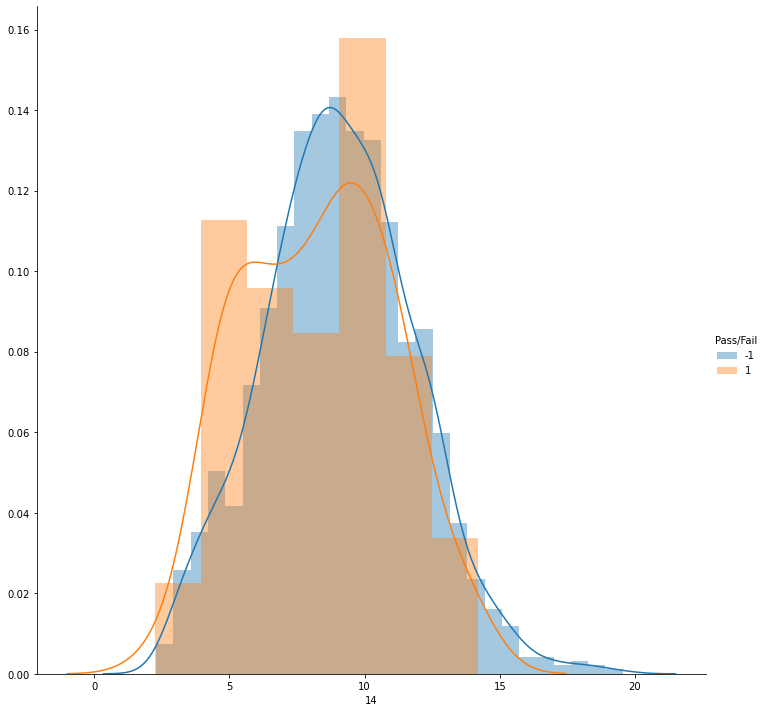

In [37]:
univariate('14')

From the above plot we can say that the signal 14 yielded failures more from 3 to 11 , than yielded pass from 5 to 12 

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


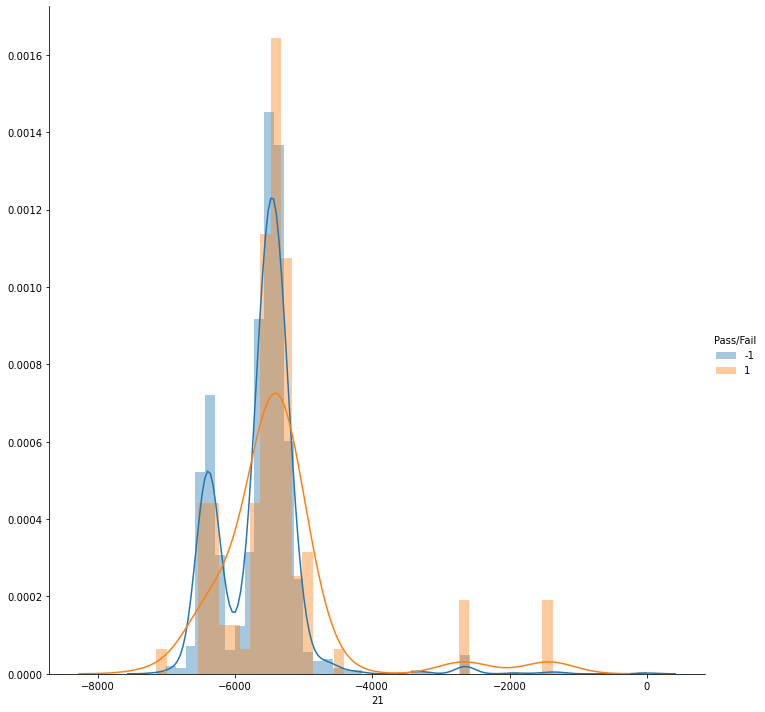

In [38]:
univariate('21')

From the above plot we can say that signal 21 yielded failure from -6000 to -5000 and pass yield is from -6000 to -5000 , but observing on y_axis the pass yield is bit less than the failure yield <br>
The distribution of the feature also has a long tail which leads to skewness <br>
The distribution of pass yield has 2 local maxima and 1 local minima (it has 2 clusters)

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


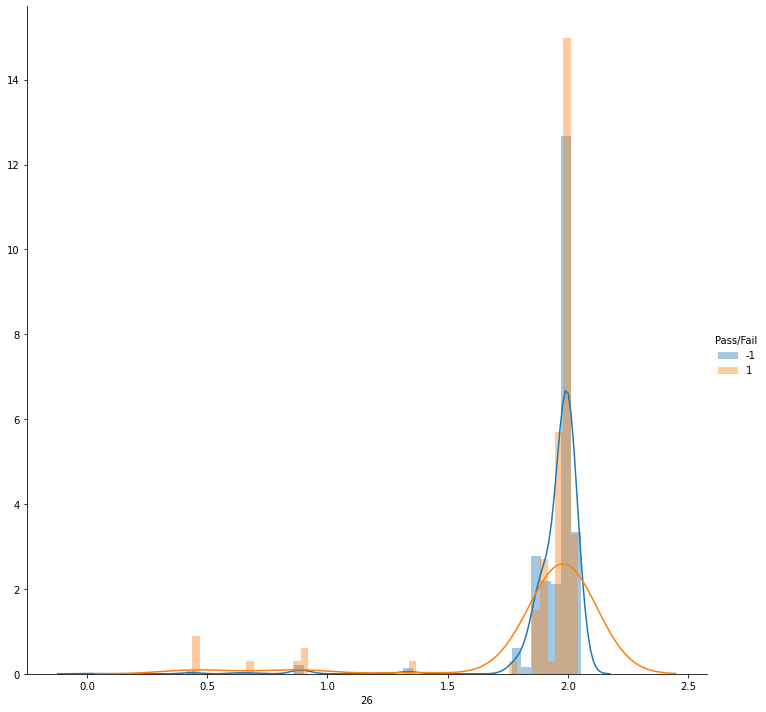

In [39]:
univariate('26')

Failure yield of signal 26 is from 2.0 to 2.1 approx which is  comparably more than the pass yield when seen on Y-Axis <br>
The pass and fail distributions have long left tails that lead to skewness<br>
the pass yield distribution has a sharp peak, whereas the failure distruburion is not sharp

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


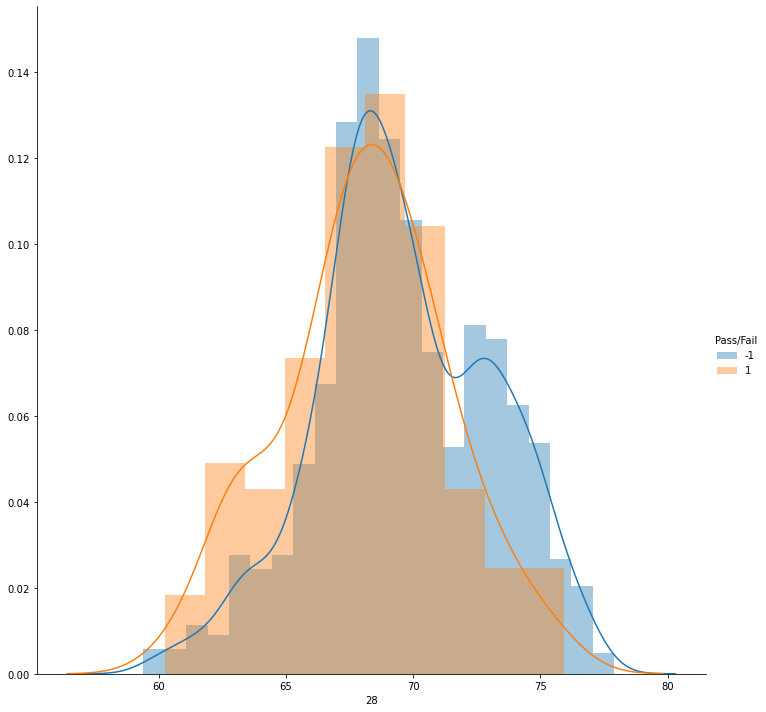

In [40]:
univariate('28')

1. The signal 28 gives out more pass yield ranging from 66 to 70, where as the failure yield is less <br>
2. the distribution of pass yield has a quite sharp peak , but not smooth, it has another peak on the right side <br>
3. the distribution of the fail yield is also having a sharp peak but less than the pass yield curve, it is smooth on the righ side, but showing some king of small peak on its left side

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


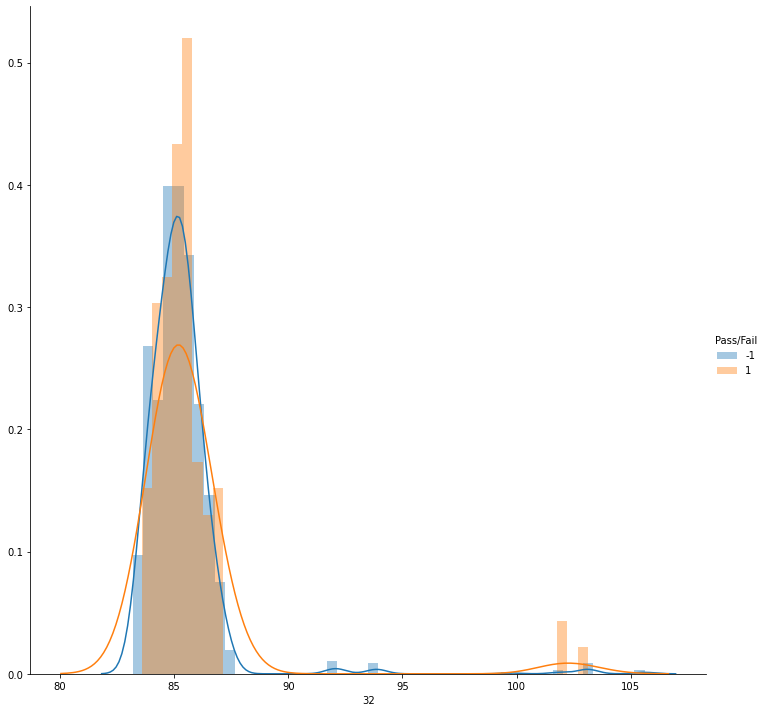

In [41]:
univariate('32')

Both distributions are having a long right tail and the fail yield of signal 32 is more from 84.5 to 85.5

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


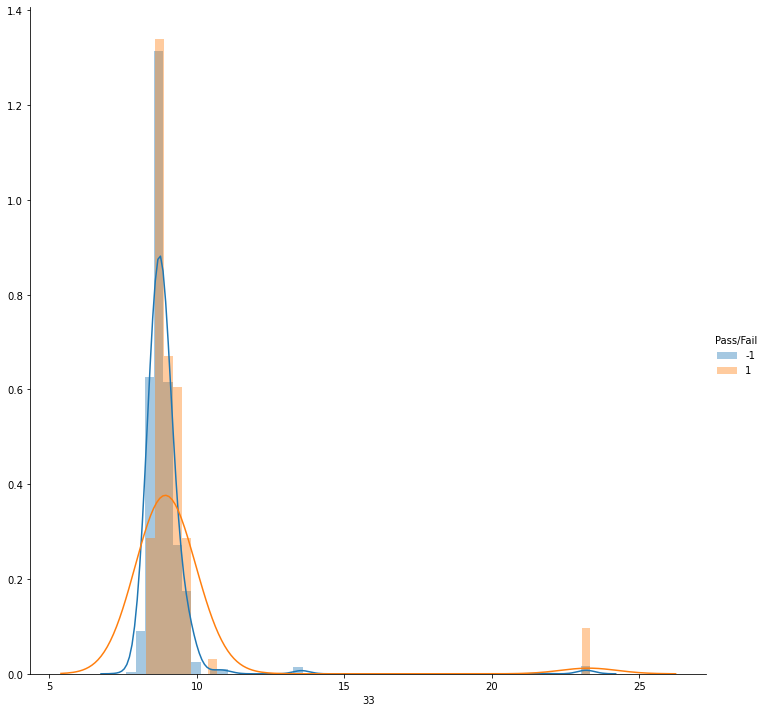

In [42]:
univariate('33')

1. Both pass yield and fail yield are almost same ranging from 8 to 9 but the width of pass yield is more rather than fail yield <br>
2. and the pass yield distribution has a sharp peak but the fail yield distibution seems to be like a normal distribution <br>
3. But both the distributions are showing long tails which leads to skewness

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


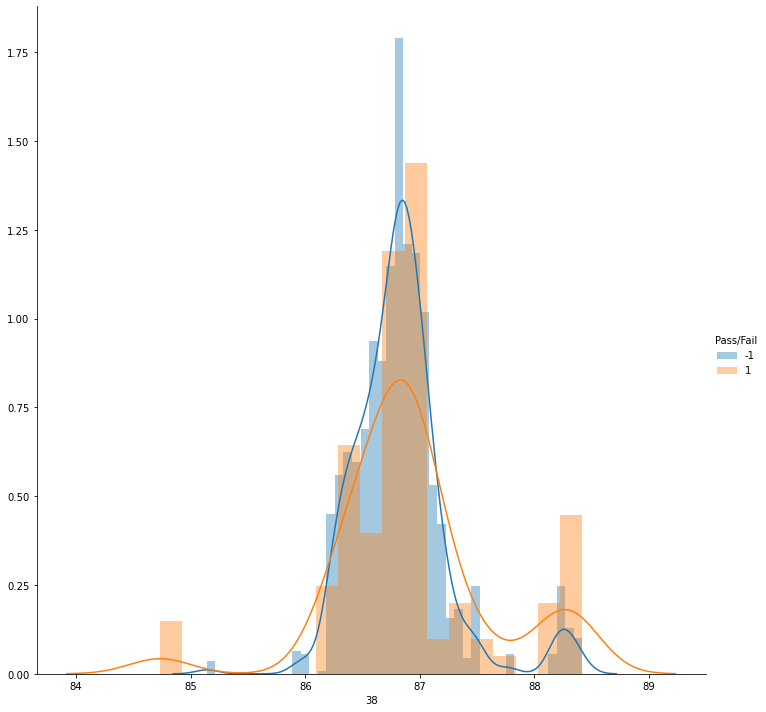

In [43]:
univariate('38')

1. The pass yield is more than the Fail yield ranging from 86.8 to 86.9 <br>
2. Both pass and fail distribution have 2 local maxima and 1 local minima

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


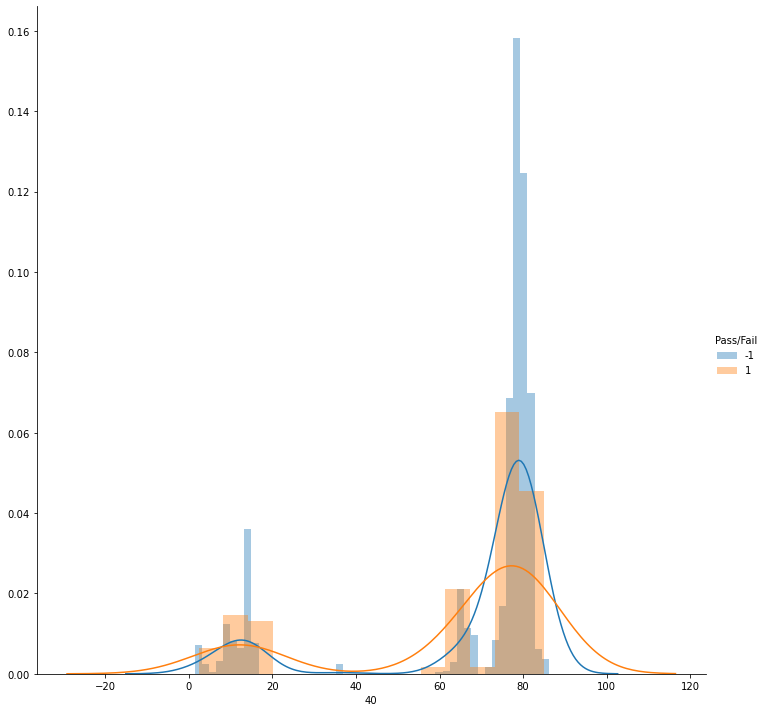

In [44]:
univariate('40')

The pass yield is more than the fail yield for signal 40 ranging from 75 to 83 and 1to2, 15to 16

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


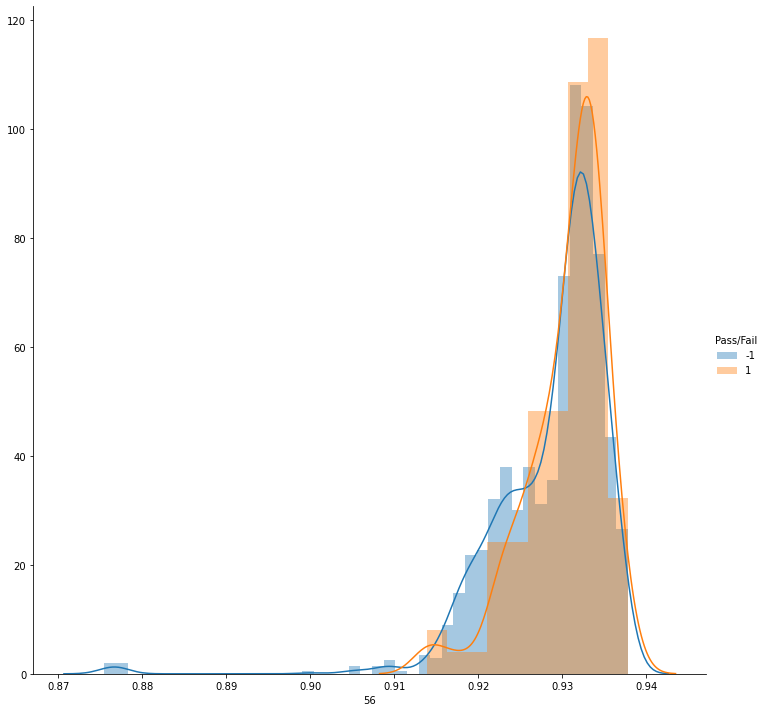

In [45]:
univariate('56')

The fail yield is more than the pass yield for signal 56 ranging from 0.93

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


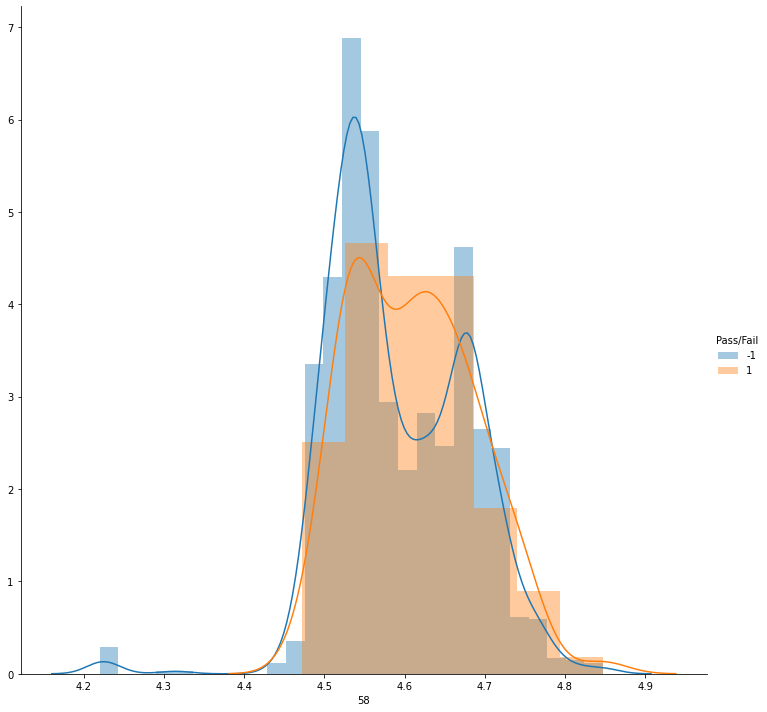

In [46]:
univariate('58')

The pass yield is more than the failure yield of signal 58 ranging from 45.2 to 45.8 and 47.0 to 47.5 <br> 
The Pass distribution has 2 peaks that is two local maxima and one local minima <br>
The fail distribution also has two small peaks <br>
Both distributions have a left tail which may lead to skewness

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


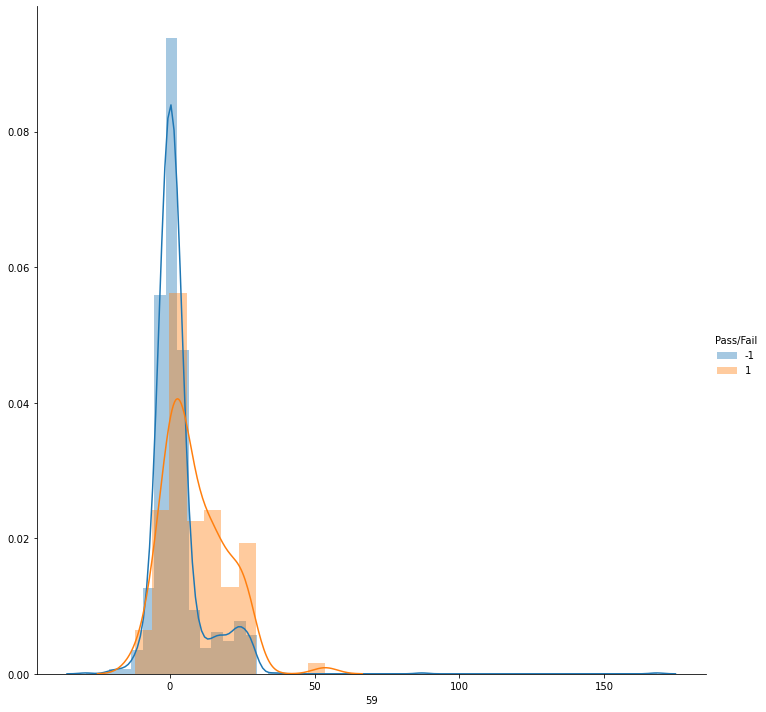

In [47]:
univariate('59')

The pass yield of signal 59 is higher compared to fail ranging from -2 to 5 <br>
Both distributions have a right tail which lead to skewness <br>
The pass distribution curve is very sharp and has 2 peaks , even the other curve also has a peak on its right side  

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


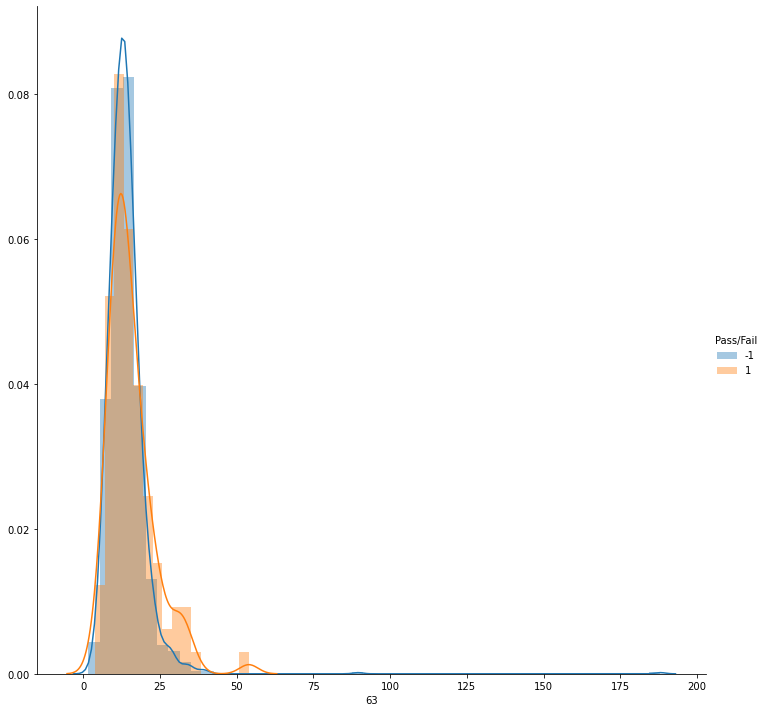

In [48]:
univariate('63')

Both PASS and FAILURE yield are almost same , but the pass distribution curve is more sharp than the failure distribution <br>
Failure distribution cureve is showing 2 peaks that is 2 local maxima and 1 local minima

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


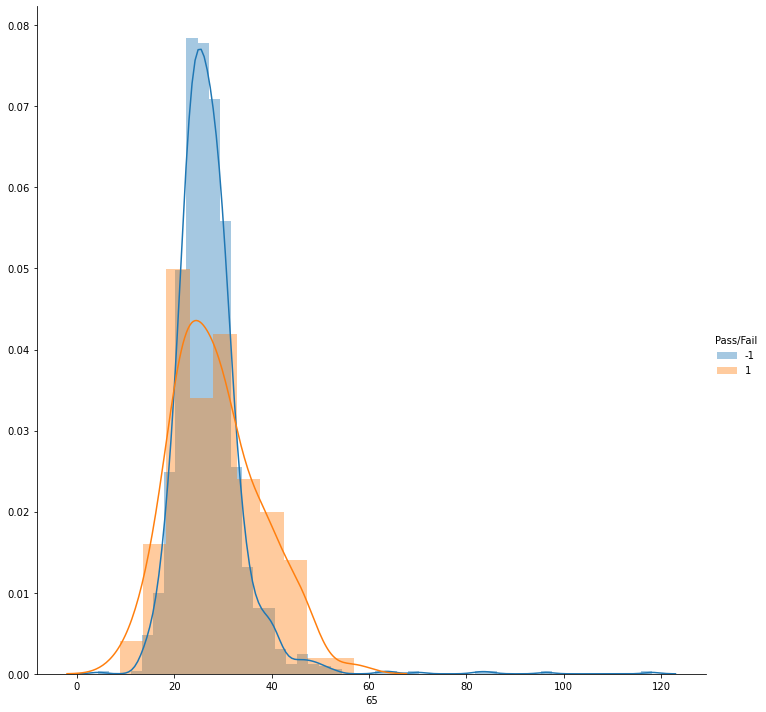

In [49]:
univariate('65')

The pass yield of the signal 65 is more than the fail yield ranging from 20 to 37 <br>
Among the two distributions the pass yield curve is very much sharper and compact than failure curve

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


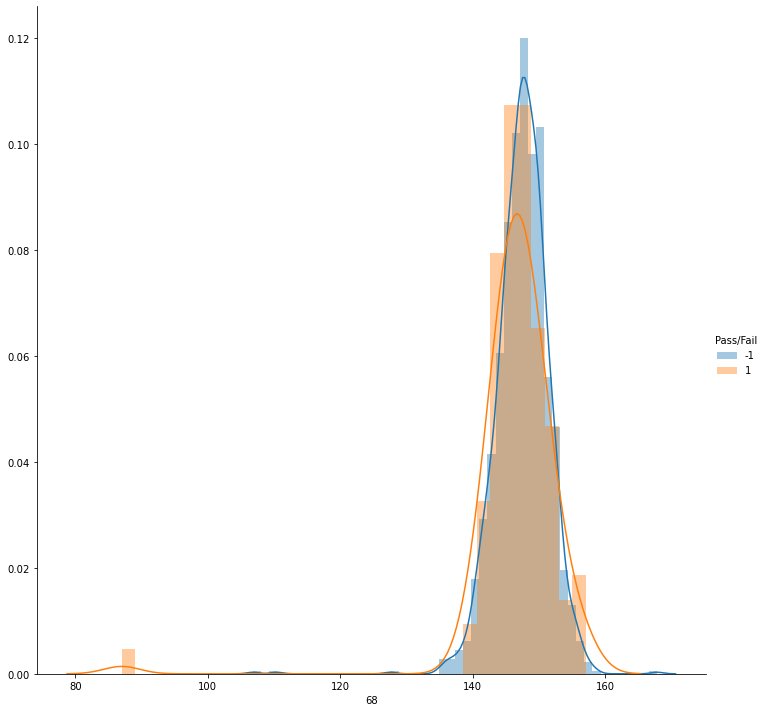

In [50]:
univariate('68')

Both the distributions has a long left tail which leads to skewness <br>
Comparing pass and fail yield , both seems to be approx same but pass yield of signal 68 is bit more ranging from 146 to 152, but the curve of failure yield is less sharper compared to pass yield

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


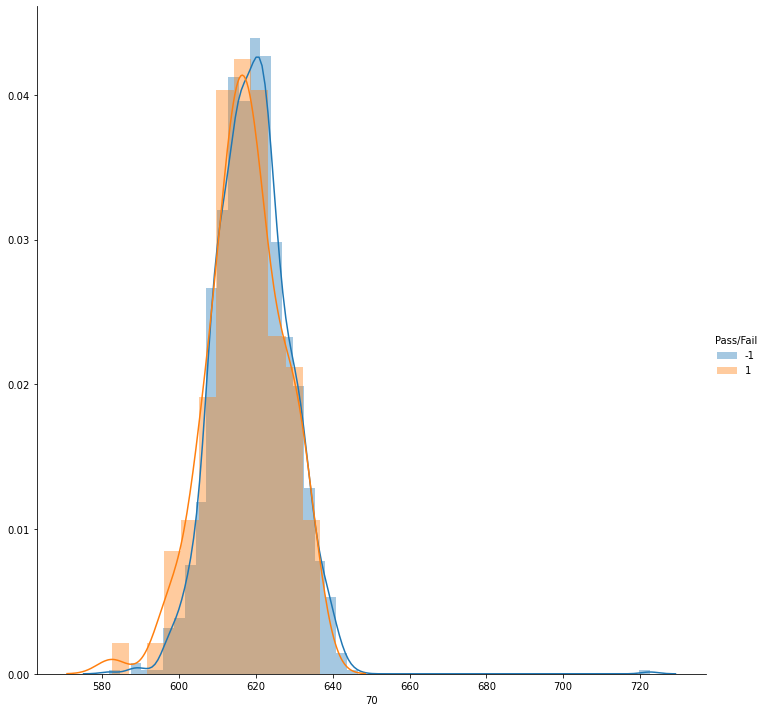

In [51]:
univariate('70')

The pass yield of signal 70 is some what more than fail yield ranging from 620 to 632 <br>
The both distribution shows small peak on the left side of the curve <br>
The both distributions also have a long right tail that leads to skewness 

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


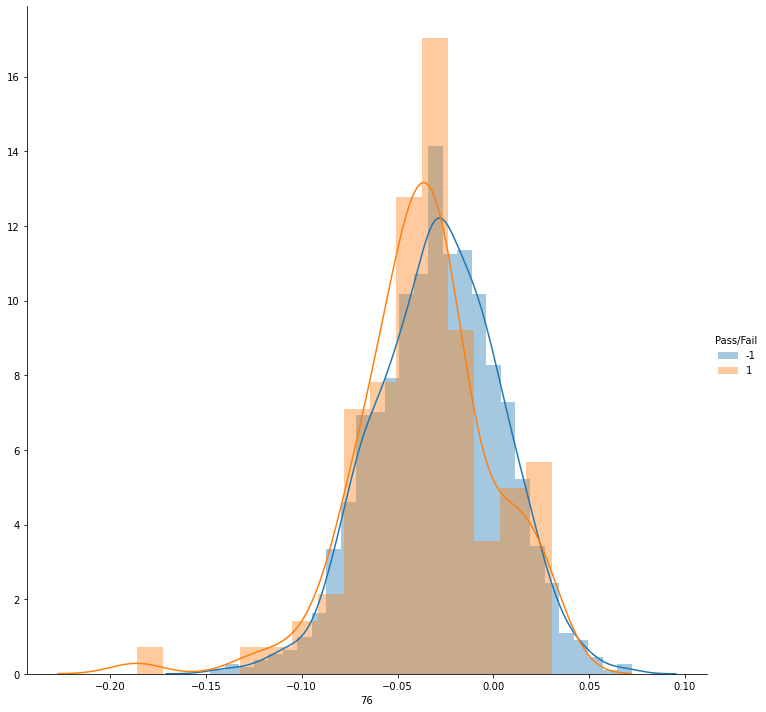

In [52]:
univariate('76')

The signal 76 is showing more failure yield ranging from -0.05 to -0.01 <br>
It has a small left tail from -0.15 to 0.00 which lead to skewness<br>
The fail distribution curve is also showing anothe rpeak on its right side

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


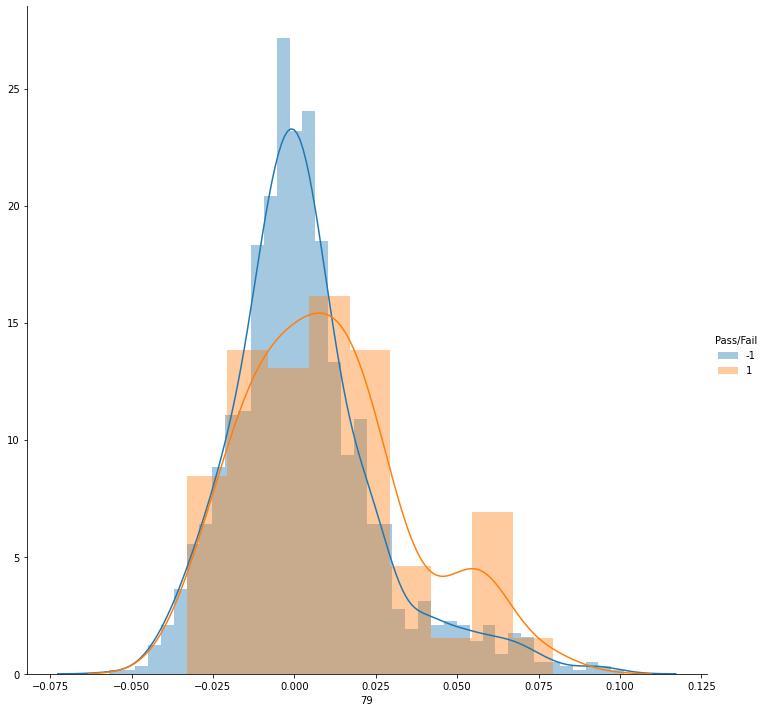

In [53]:
univariate('79')

Signal 79 is yielding more pass ranging from -0.024 to 0.023 <br>
The pass distribution curve is having a tail right side<br>
The fail distribution curve is having a peak on its right and a tail too

### 3b) Perform bivariate and multivariate analysis with appropriate detailed comments after each analysis

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.war

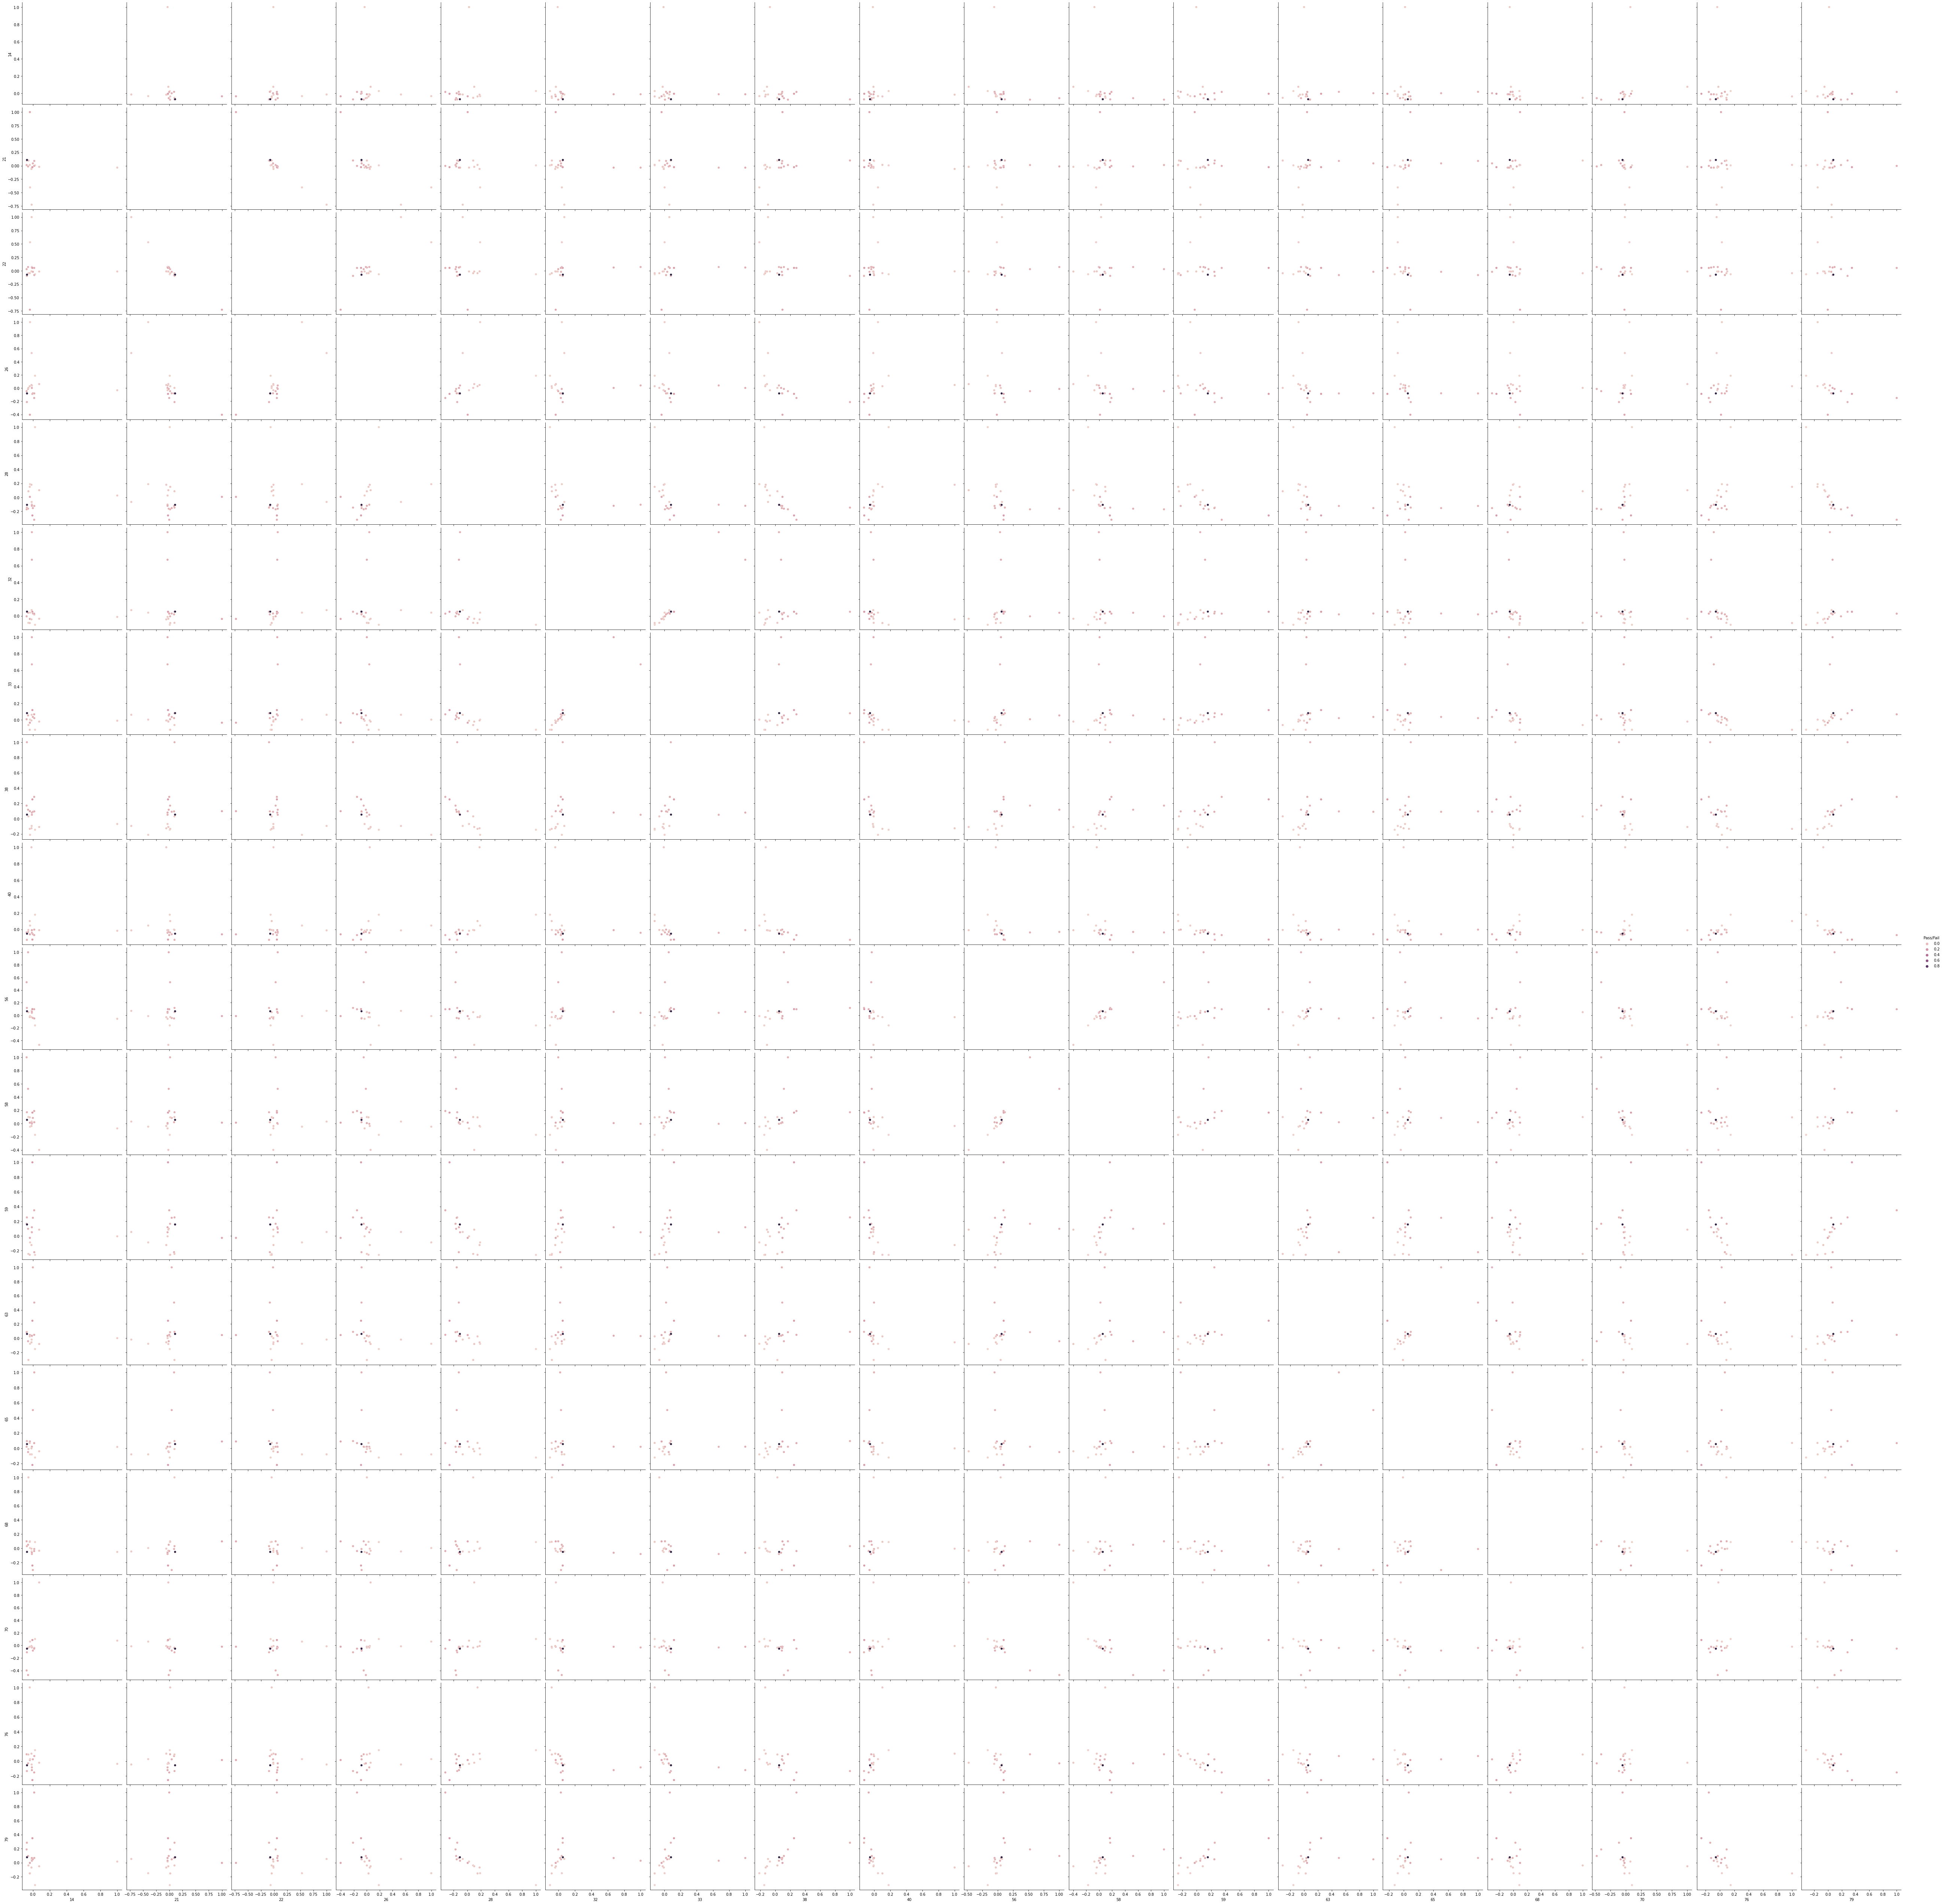

In [54]:
sns.pairplot(data=df1.corr(), hue='Pass/Fail', diag_kind='kde', height=4)

In [ ]:
def bivariate(y_value):
    sns.boxplot(x='Pass/Fail', y=y_value, data=df1)

In [ ]:
bivariate('70')